# Breast Cancer Dataset: Random Outlier Insertion Experiment
# Figure 5A in the Main Paper

In [ ]:
import numpy as np
from numpy import random
import time
import math

import pickle
import multiprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
from copy import deepcopy

from matplotlib.pyplot import figure

from matplotlib.patches import Rectangle

In [9]:
def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

### Load Original Dataset

In [48]:
train_set, train_labels, test_set, test_labels = pickle.load(open('breast_cancer_clean.data', 'rb'))

In [50]:
train_len = len(train_set)
N = train_len
feat_len = train_set.shape[1]
M = feat_len

### Get statistics about features from both classes

In [13]:
class_2_inds = np.where(train_labels == 2)[0]
class_4_inds = np.where(train_labels == 4)[0]

In [14]:
train_set_2 = train_set[class_2_inds]
train_set_4 = train_set[class_4_inds]

In [15]:
feat_means = []
feat_stds = []
all_feats = []
for i in range(feat_len):
    feat_i = train_set_2[:, i]
    feat_i_mean = np.mean(feat_i)
    feat_i_std = np.std(feat_i)
    all_feats.append(feat_i)
    feat_means.append(feat_i_mean)
    feat_stds.append(feat_i_std)

In [16]:
feat_means_4 = []
feat_stds_4 = []
all_feats_4 = []
for i in range(feat_len):
    feat_i = train_set_4[:, i]
    feat_i_mean = np.mean(feat_i)
    feat_i_std = np.std(feat_i)
    all_feats_4.append(feat_i)
    feat_means_4.append(feat_i_mean)
    feat_stds_4.append(feat_i_std)

In [17]:
all_feat_stats = { 2: [feat_means, feat_stds, 0.01] , 4: [feat_means_4, feat_stds_4, 0.05] }

In [38]:
# Getting indices 2% of total cells for outliers
total_cells = train_len * feat_len
amt = int(0.02 * total_cells)
outlier_inds = np.sort(np.random.choice(range(total_cells), amt, replace=False))

# Copy of training dataset

In [42]:
train_set_with_outlier = deepcopy(train_set)

In [44]:
outlier_inds_2 = []
outlier_inds_2_row = []
outlier_inds_4 = []
outlier_inds_4_row = []
for i in outlier_inds:
    row = int(i / feat_len)
    col = i % feat_len
    cur_label = train_labels[row]
    if cur_label == 2:
        outlier_inds_2.append(i)
        outlier_inds_2_row.append(row)
        feat_mean, feat_std, likeli = all_feat_stats[cur_label]
        norm_val = 1
        feat = 0
        while norm_val > likeli:
            feat = np.random.choice(range(1,11))
            norm_val = normpdf(feat, feat_mean[col], feat_std[col])
        train_set_with_outlier[row, col] = feat
        print(train_set_with_outlier[row, col])
        print(f'lab = {cur_label}, row = {row}, col = {col}, feat = {feat}')
    elif cur_label == 4:
        outlier_inds_4.append(i)
        outlier_inds_4_row.append(row)
        feat_mean, feat_std, likeli = all_feat_stats[cur_label]
        norm_val = 1
        feat = 10
        print(f'i {i} lik {likeli}')
        while norm_val > likeli:
            feat = np.random.choice(range(1,11))
            norm_val = normpdf(feat, feat_mean[col], feat_std[col])
        train_set_with_outlier[row, col] = feat
        print(f'lab = {cur_label}, row = {row}, col = {col}, feat = {feat}')

i 49 lik 0.05
lab = 4, row = 5, col = 4, feat = 1
i 167 lik 0.05
lab = 4, row = 18, col = 5, feat = 2
i 227 lik 0.05
lab = 4, row = 25, col = 2, feat = 2
7
lab = 2, row = 28, col = 6, feat = 7
8
lab = 2, row = 28, col = 7, feat = 8
i 327 lik 0.05
lab = 4, row = 36, col = 3, feat = 1
i 353 lik 0.05
lab = 4, row = 39, col = 2, feat = 1
i 355 lik 0.05
lab = 4, row = 39, col = 4, feat = 10
i 369 lik 0.05
lab = 4, row = 41, col = 0, feat = 2
i 465 lik 0.05
lab = 4, row = 51, col = 6, feat = 2
8
lab = 2, row = 53, col = 0, feat = 8
10
lab = 2, row = 64, col = 8, feat = 10
i 664 lik 0.05
lab = 4, row = 73, col = 7, feat = 2
i 671 lik 0.05
lab = 4, row = 74, col = 5, feat = 2
i 799 lik 0.05
lab = 4, row = 88, col = 7, feat = 1
i 947 lik 0.05
lab = 4, row = 105, col = 2, feat = 1
8
lab = 2, row = 108, col = 1, feat = 8
8
lab = 2, row = 114, col = 0, feat = 8
i 1055 lik 0.05
lab = 4, row = 117, col = 2, feat = 2
i 1059 lik 0.05
lab = 4, row = 117, col = 6, feat = 1
i 1106 lik 0.05
lab = 4, row =

In [45]:
to_save = [train_set_with_outlier, train_labels, test_set, test_labels, outlier_inds_2, outlier_inds_4]
pickle.dump(to_save, open("breast_cancer_perturb_total_cells_2pc.data", 'wb'))

1. Now we have prepared data with injected outliers, we need to run a python file to calculate 2D Shapley values.
 
2. We recommend running a the python file for 2D Shapley calculation for 1000 permutations.
3. The python prompt:


```{pythton}

    python breast_cancer_2d_knn.py --pfrom 0 --pto 1000

```

4. After that we combine the permutations of 2D Shapley values. A file with combined values is included in the repository.

## Load 2D Shapley Values

Clean Dataset 2D Shapley Values

In [75]:
train_set_with_outlier[144]

array([6, 9, 7, 5, 5, 8, 4, 2, 6])

In [73]:
class_2_inds[62]

144

In [53]:
sv2d = np.zeros((M, N))
feat_count = np.zeros(M)
for p in range(0,1000):
#     if p % 100 == 0:
#         print(p)
    load_file = pickle.load( open("breast_2d_knn_permutations_clean/perm_" + str(p) + ".txt", 'rb'))
#     print(load_file[0].shape)
    sv2d += load_file[0]
    feat_count += load_file[1]
norm_sv2d = np.zeros((M, N))
for i in range(M):
    norm_sv2d[i] = sv2d[i]/feat_count[i]
print("Loaded 2D Shapley Values for Clean Breast Cancer Dataset")

Loaded 2D Shapley Values for Clean Breast Cancer Dataset


Alternatively load from a prepared file

In [118]:
norm_sv2d = pickle.load(open('breast_2d_permutations_clean_combined.values', 'rb'))
print("Loaded 2D Shapley Values for Clean Breast Cancer Dataset From a File")

Loaded 2D Shapley Values for Clean Breast Cancer Dataset From a File


Injected Outlier Dataset 2D Shapley Values

In [56]:
sv2d_outlier = np.zeros((M, N))
feat_count = np.zeros(M)
for p in range(0,1000):
#     if p % 100 == 0:
#         print(p)
    load_file = pickle.load( open("breast_2d_knn_permutations_2pc/perm_" + str(p) + ".txt", 'rb'))
#     print(load_file[0].shape)
    sv2d_outlier += load_file[0]
    feat_count += load_file[1]
norm_sv2d_outlier = np.zeros((M, N))
for i in range(M):
    norm_sv2d_outlier[i] = sv2d_outlier[i]/feat_count[i]
print("Loaded 2D Shapley Values for Randomly Injected Outliers Cancer Dataset")

Loaded 2D Shapley Values for Randomly Injected Outliers Cancer Dataset


Alternatively load from a prepared file

In [120]:
norm_sv2d_outlier = pickle.load(open('breast_2d_permutations_outlier_combined.values', 'rb'))
print("Loaded 2D Shapley Values for Randomly Injected Outliers Cancer Dataset From a File")

Loaded 2D Shapley Values for Randomly Injected Outliers Cancer Dataset From a File


Plot a heatmap of 2D Shapley Values for Benign Patient

In [121]:
plt.rcParams["font.family"] = "serif"

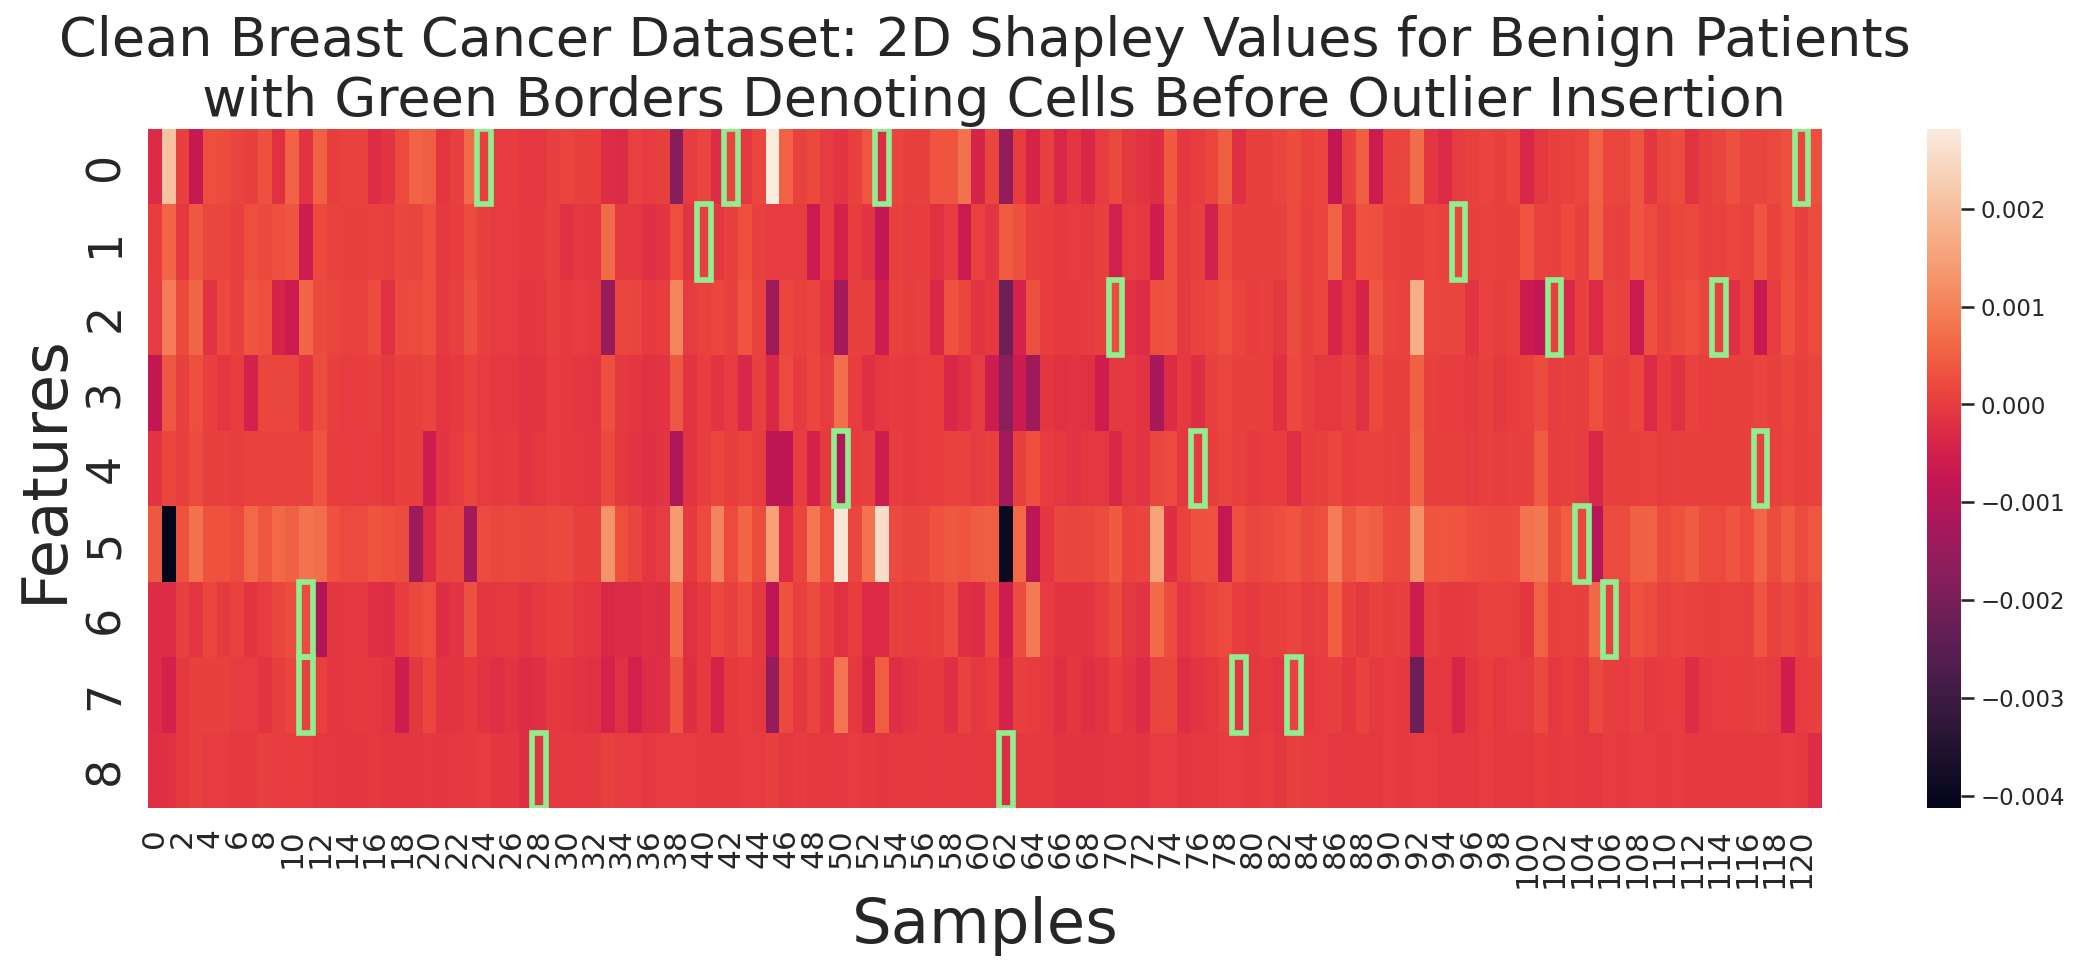

In [122]:
figure(figsize=(18, 6), dpi=150)
sns.set()
ax = sns.heatmap(norm_sv2d[:9,class_2_inds]) 

for i in outlier_inds_2:
    r = int(i/feat_len)
    c = i % feat_len
    pos_s = np.argwhere(class_2_inds == r)[0,0]
    pos_f = c
    ax.add_patch(Rectangle((pos_s, pos_f), 1, 1, fill=False, edgecolor='lightgreen', lw=2.7))

plt.xticks(fontsize=15)
plt.yticks(fontsize=22)
    
plt.title('Clean Breast Cancer Dataset: 2D Shapley Values for Benign Patients\n with Green Borders Denoting Cells Before Outlier Insertion', fontsize=26)
plt.xlabel('Samples', fontsize=30)
plt.ylabel('Features', fontsize=30)
plt.show()

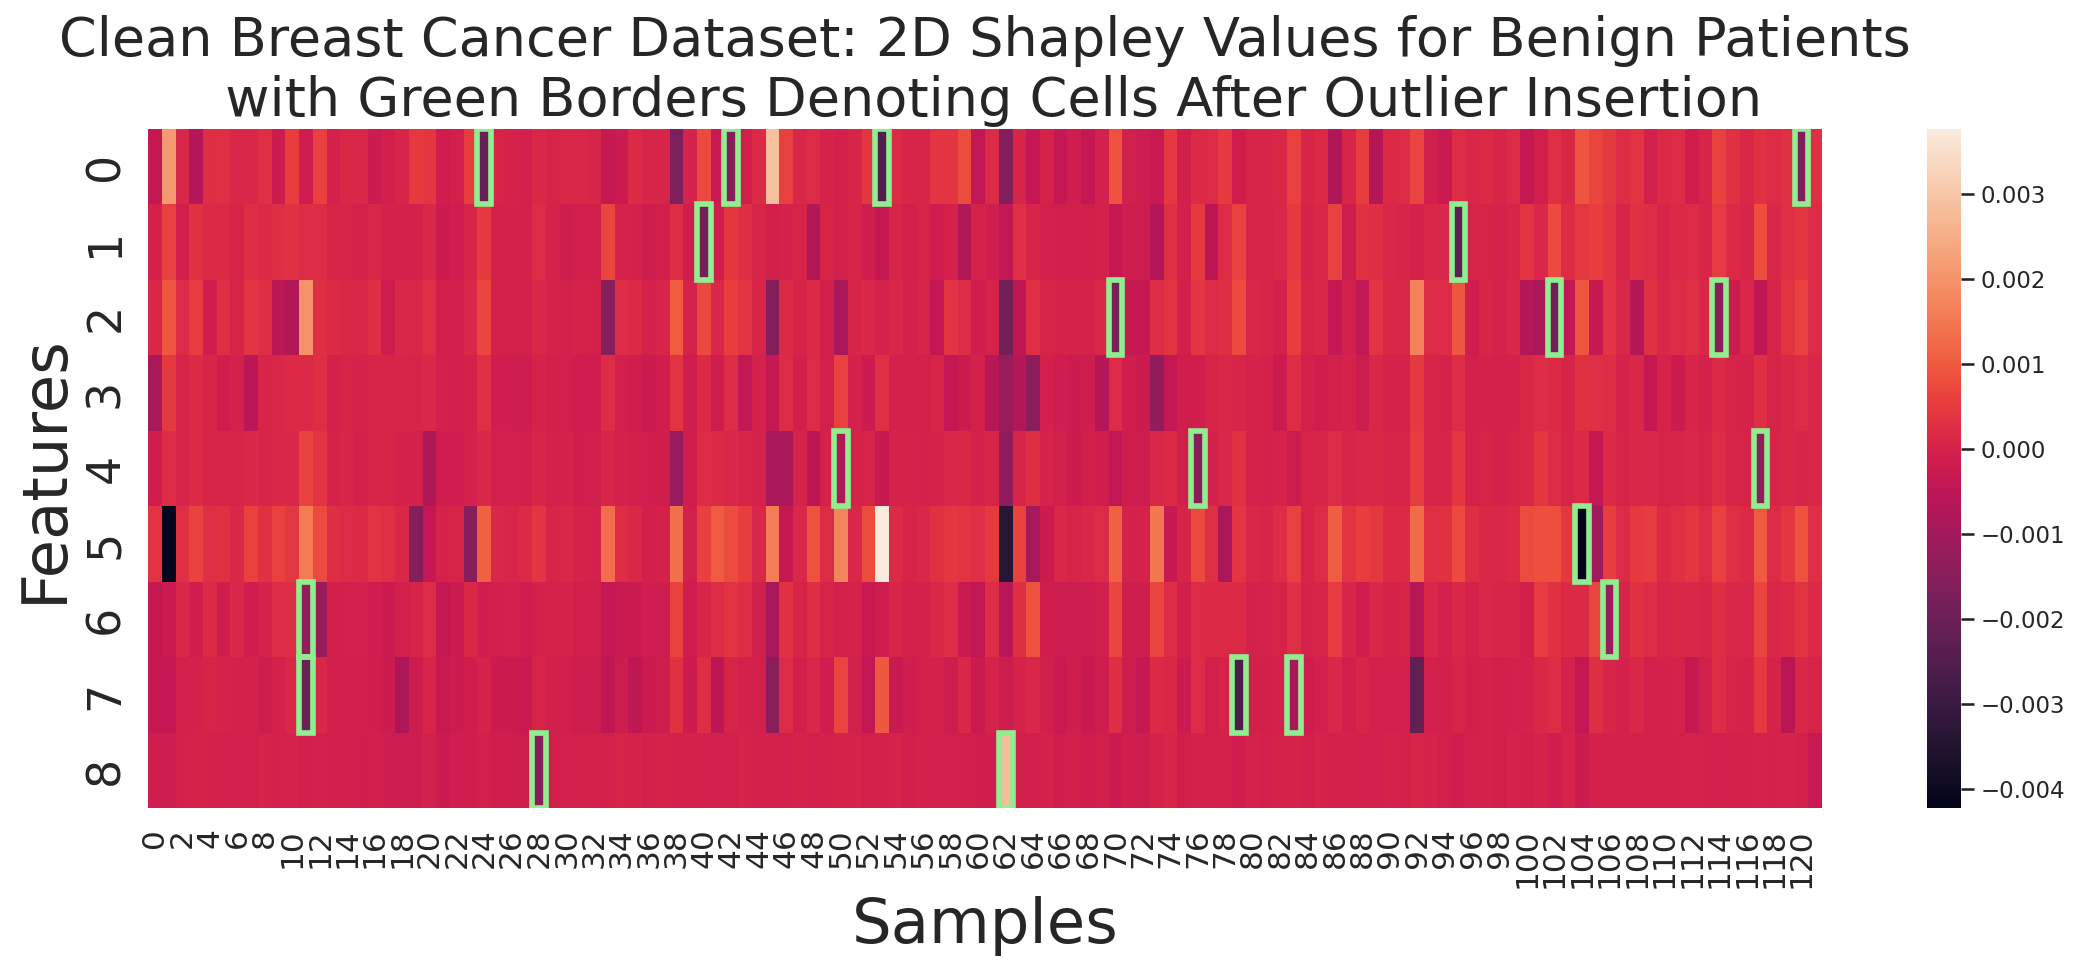

In [123]:
figure(figsize=(18, 6), dpi=150)
sns.set()
ax = sns.heatmap(norm_sv2d_outlier[:9,class_2_inds]) 

for i in outlier_inds_2:
    r = int(i/feat_len)
    c = i % feat_len
    pos_s = np.argwhere(class_2_inds == r)[0,0]
    pos_f = c
    ax.add_patch(Rectangle((pos_s, pos_f), 1, 1, fill=False, edgecolor='lightgreen', lw=2.7))

plt.xticks(fontsize=15)
plt.yticks(fontsize=22)
    
plt.title('Clean Breast Cancer Dataset: 2D Shapley Values for Benign Patients\n with Green Borders Denoting Cells After Outlier Insertion', fontsize=26)
plt.xlabel('Samples', fontsize=30)
plt.ylabel('Features', fontsize=30)
plt.show()

Detection Rate Plot

In [124]:
# Converting Indices
class_2_pert_inds = []
for i in outlier_inds_2:
    r = int(i/feat_len)
    c = i % feat_len
    pos_s = np.argwhere(class_2_inds == r)[0,0]
    pos_f = c
    new_ind = pos_s * feat_len + pos_f
    class_2_pert_inds.append(new_ind)

Text(0.5, 1.0, 'Breast Cancer: Detection of Inserted Random Outliers \n Before & After Insertion for Benign Patients')

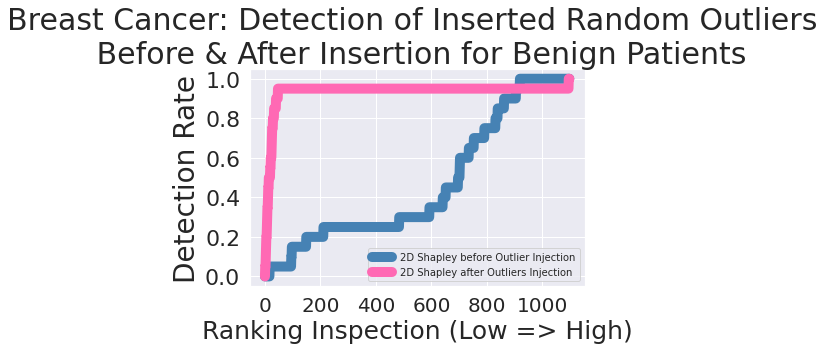

In [125]:

detect_rate = []
count = 0
sorted_sv2d_class2 = np.argsort(norm_sv2d[:9,class_2_inds].T.flatten())
for i in range(len(sorted_sv2d_class2)):
    cur_ind = sorted_sv2d_class2[i]
    if cur_ind in class_2_pert_inds:
        count += 1
    detect_rate.append(count)
detect_rate = np.array(detect_rate) / detect_rate[-1]
plt.plot(range(len(detect_rate)), detect_rate, label='2D Shapley before Outlier Injection', color='steelblue', linewidth=10)


detect_rate = []
count = 0
sorted_sv2d_class2 = np.argsort(norm_sv2d_outlier[:9,class_2_inds].T.flatten())
for i in range(len(sorted_sv2d_class2)):
    cur_ind = sorted_sv2d_class2[i]
    if cur_ind in class_2_pert_inds:
        count += 1
    detect_rate.append(count)
detect_rate = np.array(detect_rate) / detect_rate[-1]
plt.plot(range(len(detect_rate)), detect_rate, label='2D Shapley after Outliers Injection', color='hotpink', linewidth=10)


plt.legend(fontsize=10)
plt.yticks(fontsize=22)
plt.xticks(fontsize=20)

plt.xlabel('Ranking Inspection (Low => High)', fontsize=25)
plt.ylabel('Detection Rate', fontsize=28)
plt.title("Breast Cancer: Detection of Inserted Random Outliers \n Before & After Insertion for Benign Patients", fontsize=30)
